<a href="https://colab.research.google.com/github/jordantcarlisle/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












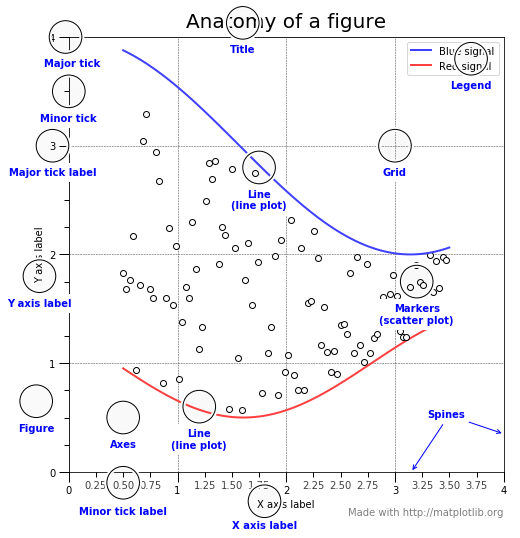

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Matplotlib

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [3]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

# Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

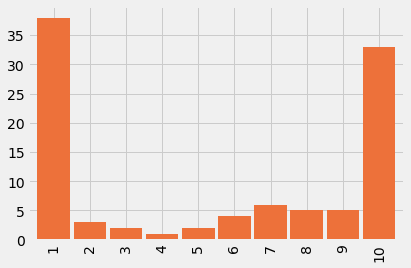

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                  index=range(1, 11)) 

fake.plot.bar(color='#ed713a', width=0.9);

In [5]:
style_list = ['default', 'classic'] + sorted(
    style for style in plt.style.available if style != 'classic') 
style_list

['default',
 'classic',
 'Solarize_Light2',
 '_classic_test',
 'bmh',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
fake2 = pd.Series (
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

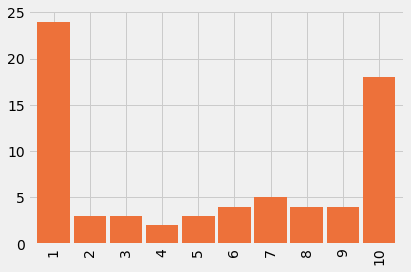

In [7]:
plt.style.use('fivethirtyeight')
fake2.value_counts().sort_index().plot.bar(color= '#ed713a', width = 0.9);

## Annotate with text

In [8]:
display(example)

Text(0, 0.5, 'Percent of total votes')

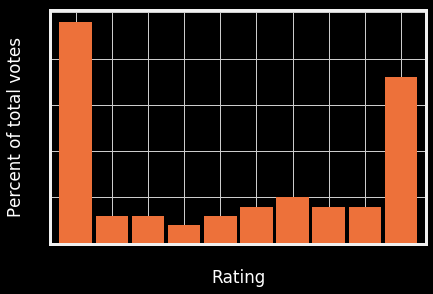

In [9]:
fig = plt.figure(facecolor='black')

ax = fake2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9);
ax.set(facecolor='black')

plt.xlabel('Rating', color = 'white')
plt.ylabel('Percent of total votes', color = 'white')

In [10]:
display(example)

In [11]:
list(range(0, 50, 10))

[0, 10, 20, 30, 40]

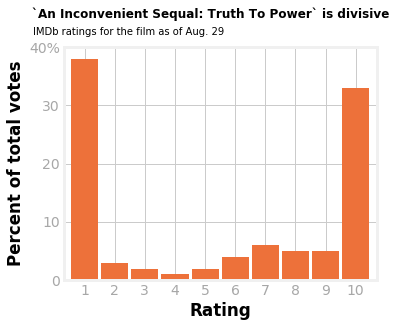

In [12]:
fig = plt.figure(facecolor='white', figsize=(5, 4))

ax = fake.plot.bar(color='#ed713a', width =0.9)
ax.set(facecolor='white')
ax.patch.set_alpha(0.1)

plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Percent of total votes', fontweight='bold')
plt.title('`An Inconvenient Sequal: Truth To Power` is divisive', 
          fontsize=12,
          loc='left',
          x=-0.1,
          y=1.1, 
          fontweight='bold')

#ax.text(x=-1.7, y=42, s='IMDb ratings for the film as of Aug. 29')
plt.text(x=-1.7, y=fake.max() + 4, s='IMDb ratings for the film as of Aug. 29', fontsize=10)

plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0, 50, 10), labels=[f'{i}' if i!=40 else f'{i}%' for i in range(0, 50, 10)], color='#a7a7a7');


[link text](https://)## Reproduce with real data

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

timestamp  respondents  ... 9_pct 10_pct
0  2017-07-17 12:28:32.785639          402  ...   5.0   33.6
1  2017-07-17 12:28:33.025600           78  ...   3.8   62.8
2  2017-07-17 12:28:33.273919            4  ...   0.0   25.0
3  2017-07-17 12:28:33.495325            4  ...   0.0   25.0
4  2017-07-17 12:28:33.722849          130  ...   4.6   49.2

[5 rows x 27 columns]

In [14]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [16]:
#why did we use the describe() method here? 
df.describe()

respondents       average  ...         9_pct        10_pct
count  80053.000000  80053.000000  ...  80053.000000  80053.000000
mean     403.390804      5.331478  ...      5.978127     35.431905
std      544.977400      1.673279  ...      5.759520     15.814088
min        1.000000      1.000000  ...      0.000000      0.000000
25%       34.000000      4.300000  ...      3.600000     26.300000
50%      244.000000      5.300000  ...      5.300000     35.500000
75%      518.000000      6.500000  ...      6.400000     45.100000
max     2662.000000      8.500000  ...     33.300000     82.800000

[8 rows x 24 columns]

In [17]:
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [18]:
df['timestamp'].min()

Timestamp('2017-07-17 12:28:32.785639')

In [19]:
df['timestamp'].max()

Timestamp('2017-08-29 23:10:06.218251')

In [0]:
df = df.set_index('timestamp')

In [21]:
df.head()

respondents        category  ... 9_pct  10_pct
timestamp                                                ...              
2017-07-17 12:28:32.785639          402           Males  ...   5.0    33.6
2017-07-17 12:28:33.025600           78         Females  ...   3.8    62.8
2017-07-17 12:28:33.273919            4   Aged under 18  ...   0.0    25.0
2017-07-17 12:28:33.495325            4  Males under 18  ...   0.0    25.0
2017-07-17 12:28:33.722849          130      Aged 18-29  ...   4.6    49.2

[5 rows x 26 columns]

In [22]:
df['2017-08-29']

respondents            category  ... 9_pct  10_pct
timestamp                                                    ...              
2017-08-29 00:00:02.248882         1682               Males  ...   4.9    30.9
2017-08-29 00:00:02.499363          257             Females  ...  10.1    51.0
2017-08-29 00:00:02.727204           15       Aged under 18  ...   0.0    40.0
2017-08-29 00:00:03.024270           13      Males under 18  ...   0.0    46.2
2017-08-29 00:00:03.248207            2    Females under 18  ...   0.0     0.0
2017-08-29 00:00:03.441529          450          Aged 18-29  ...   5.1    42.2
2017-08-29 00:00:03.636825          402    Males Aged 18-29  ...   5.2    40.5
2017-08-29 00:00:03.839446           41  Females Aged 18-29  ...   4.9    56.1
2017-08-29 00:00:04.030663          771          Aged 30-44  ...   6.4    32.4
2017-08-29 00:00:04.225962          679    Males Aged 30-44  ...   5.7    29.5
2017-08-29 00:00:04.539312           76  Females Aged 30-44  ...  11.8    61.8
2017-08-29 00:00:04.776104          539            Aged 45+  ...   6.5    24.5
2017-08-29 00:00:04.973766          421      Males Aged 45+  ...   4.8    20.4
2017-08-29 00:00:05.176998          109    Females Aged 45+  ...  13.8    40.4
2017-08-29 00:00:05.366554            8          IMDb staff  ...  25.0    12.5
2017-08-29 00:00:05.556598           41     Top 1000 voters  ...   2.4    14.6
2017-08-29 00:00:05.767397          922            US users  ...   6.3    28.1
2017-08-29 00:00:05.964362          556        Non-US users  ...   6.3    36.3
2017-08-29 00:00:06.288486         2646          IMDb users  ...   5.4    33.7
2017-08-29 00:10:02.437655         1682               Males  ...   4.9    30.9
2017-08-29 00:10:02.715850          257             Females  ...  10.1    51.0
2017-08-29 00:10:02.974317           15       Aged under 18  ...   0.0    40.0
2017-08-29 00:10:03.242796           13      Males under 18  ...   0.0    46.2
2017-08-29 00:10:03.471974            2    Females under 18  ...   0.0     0.0
2017-08-29 00:10:03.701915          450          Aged 18-29  ...   5.1    42.2
2017-08-29 00:10:03.922894          402    Males Aged 18-29  ...   5.2    40.5
2017-08-29 00:10:04.168584           41  Females Aged 18-29  ...   4.9    56.1
2017-08-29 00:10:04.391835          771          Aged 30-44  ...   6.4    32.4
2017-08-29 00:10:04.630956          679    Males Aged 30-44  ...   5.7    29.5
2017-08-29 00:10:04.819991           76  Females Aged 30-44  ...  11.8    61.8
...                                 ...                 ...  ...   ...     ...
2017-08-29 23:00:03.683160          775          Aged 30-44  ...   6.5    32.3
2017-08-29 23:00:03.924760          682    Males Aged 30-44  ...   5.7    29.3
2017-08-29 23:00:04.189034           77  Females Aged 30-44  ...  13.0    61.0
2017-08-29 23:00:04.381826          544            Aged 45+  ...   6.6    24.4
2017-08-29 23:00:04.619175          424      Males Aged 45+  ...   4.7    20.5
2017-08-29 23:00:04.820031          111    Females Aged 45+  ...  14.4    39.6
2017-08-29 23:00:05.028872            8          IMDb staff  ...  25.0    12.5
2017-08-29 23:00:05.231674           41     Top 1000 voters  ...   2.4    14.6
2017-08-29 23:00:05.442596          925            US users  ...   6.5    28.0
2017-08-29 23:00:05.634805          565        Non-US users  ...   6.2    36.1
2017-08-29 23:00:05.829558         2662          IMDb users  ...   5.5    33.7
2017-08-29 23:10:02.207706         1693               Males  ...   4.9    30.8
2017-08-29 23:10:02.398710          261             Females  ...  10.7    50.2
2017-08-29 23:10:02.622019           15       Aged under 18  ...   0.0    40.0
2017-08-29 23:10:02.908857           13      Males under 18  ...   0.0    46.2
2017-08-29 23:10:03.088635            2    Females under 18  ...   0.0     0.0
2017-08-29 23:10:03.288272          455          Aged 18-29  ...   5.1    42.0
2017-08-29 23:10:03.501039          406    Males Aged 18-29  ...   5.2    40.4

In [0]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']

In [24]:
lastday_filtered.head()

respondents    category  ... 9_pct  10_pct
timestamp                                            ...              
2017-08-29 00:00:06.288486         2646  IMDb users  ...   5.4    33.7
2017-08-29 00:10:06.763461         2646  IMDb users  ...   5.4    33.7
2017-08-29 00:20:05.745307         2646  IMDb users  ...   5.4    33.7
2017-08-29 00:30:05.818552         2646  IMDb users  ...   5.4    33.7
2017-08-29 00:40:06.180928         2646  IMDb users  ...   5.4    33.7

[5 rows x 26 columns]

In [25]:
lastday_filtered.tail()

respondents    category  ... 9_pct  10_pct
timestamp                                            ...              
2017-08-29 22:30:06.423181         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:40:06.233659         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:50:06.592571         2662  IMDb users  ...   5.5    33.7
2017-08-29 23:00:05.829558         2662  IMDb users  ...   5.5    33.7
2017-08-29 23:10:06.218251         2662  IMDb users  ...   5.5    33.7

[5 rows x 26 columns]

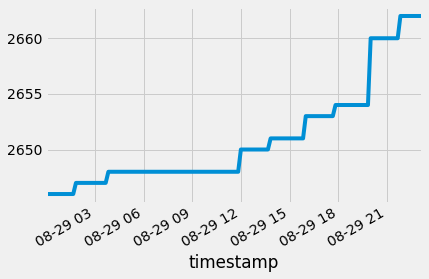

In [26]:
lastday_filtered['respondents'].plot()

In [27]:
lastday_filtered['category'].value_counts()

IMDb users    140
Name: category, dtype: int64

In [28]:
pct_columns = [f'{i}_pct' for i in range(1, 11)]
pct_columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [0]:
final = lastday_filtered.tail(1)

In [30]:
final

respondents    category  ... 9_pct  10_pct
timestamp                                            ...              
2017-08-29 23:10:06.218251         2662  IMDb users  ...   5.5    33.7

[1 rows x 26 columns]

In [31]:
final[pct_columns].T

timestamp  2017-08-29 23:10:06.218251
1_pct                            38.4
2_pct                             2.6
3_pct                             1.4
4_pct                             0.9
5_pct                             2.1
6_pct                             4.1
7_pct                             5.8
8_pct                             5.5
9_pct                             5.5
10_pct                           33.7

In [0]:
plot_data = final[pct_columns].T
plot_data.index = range(1, 11)

In [33]:
plot_data

timestamp  2017-08-29 23:10:06.218251
1                                38.4
2                                 2.6
3                                 1.4
4                                 0.9
5                                 2.1
6                                 4.1
7                                 5.8
8                                 5.5
9                                 5.5
10                               33.7

In [34]:
display(example)

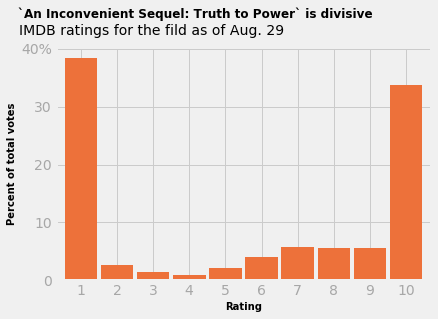

In [35]:
plt.style.use('fivethirtyeight')

ax = plot_data.plot.bar(color='#ed713a', width=0.9)

plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold')
plt.title('`An Inconvenient Sequel: Truth to Power` is divisive', 
          fontsize=12,
          x=-0.1, y=1.1, loc='left', 
          fontweight='bold')
plt.text(x=-1.7, y=plot_data.max() + 4, s='IMDB ratings for the fild as of Aug. 29')
plt.xticks(rotation=0, color='#a7a7a7')
plt.yticks(range(0, 50, 10), labels=[f'{i}' if i !=40 else f'{i}%' for i in range(0, 50, 10)], color='#a7a7a7');
legend = ax.legend()
legend.remove()

# Intro to Seaborn

In [0]:
import seaborn as sns

In [37]:
df = pd.read_csv('Pokemon.csv')
df = df.drop(columns=['#'])
df.head()

Name Type 1  Type 2  ...  Speed  Generation  Legendary
0              Bulbasaur  Grass  Poison  ...     45           1      False
1                Ivysaur  Grass  Poison  ...     60           1      False
2               Venusaur  Grass  Poison  ...     80           1      False
3  VenusaurMega Venusaur  Grass  Poison  ...     80           1      False
4             Charmander   Fire     NaN  ...     65           1      False

[5 rows x 12 columns]

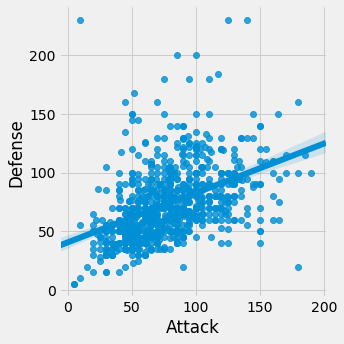

In [38]:
sns.lmplot(x='Attack', y='Defense', data=df)

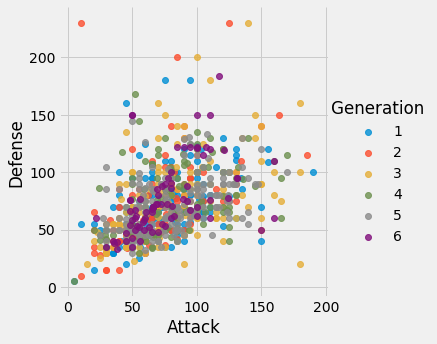

In [39]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Generation')

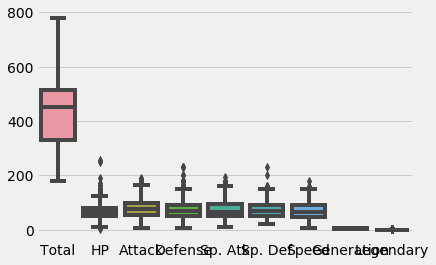

In [40]:
sns.boxplot(data=df)

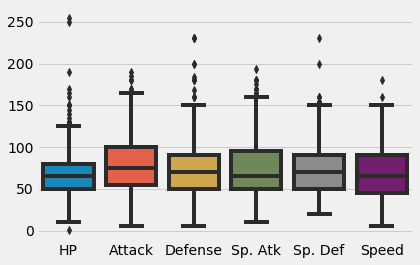

In [41]:
stats_df = df.drop(columns=['Total', 'Generation', 'Legendary'])
sns.boxplot(data=stats_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

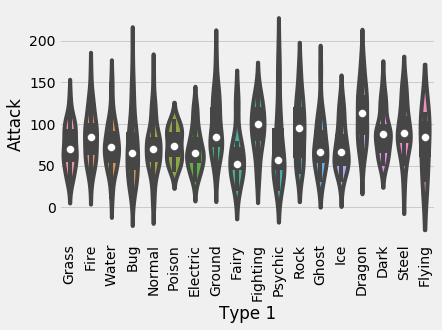

In [42]:
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.xticks(rotation=90)

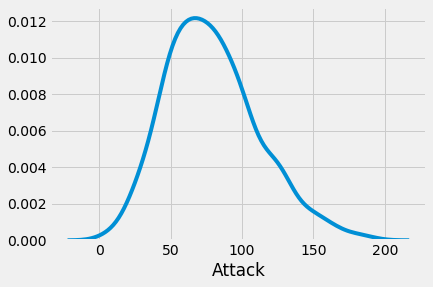

In [43]:
sns.distplot(df['Attack'], bins=20, hist=False)

This doesn't work because the data stops at 1970. 

In [44]:

#Lakers 33 games to greatness https://projects.fivethirtyeight.com/complete-history-of-the-nba/#lakers
url2 = 'https://fivethirtyeight.com/wp-content/uploads/2015/05/lakers1.png?w=1220&#038;h=882'
example2 = Image(url = url2, width=600)
display(example2)

In [75]:

import matplotlib.pyplot as plt
nba = pd.read_csv('nbaallelo.csv')
nba.head()

gameorder       game_id lg_id  ...  game_result  forecast notes
0          1  194611010TRH   NBA  ...            L  0.640065   NaN
1          1  194611010TRH   NBA  ...            W  0.359935   NaN
2          2  194611020CHS   NBA  ...            W  0.631101   NaN
3          2  194611020CHS   NBA  ...            L  0.368899   NaN
4          3  194611020DTF   NBA  ...            L  0.640065   NaN

[5 rows x 23 columns]

In [81]:
nba_lakers_seventies = nba[(nba['fran_id'] == 'Lakers') & (nba['year_id'] > 1969) & (nba['year_id'] < 1973)]
nba_lakers_seventies

gameorder       game_id lg_id  ...  game_result  forecast          notes
19330       9666  196910170PHI   NBA  ...            L  0.445694            NaN
19349       9675  196910180NYK   NBA  ...            L  0.299337            NaN
19369       9685  196910210BAL   NBA  ...            W  0.425337            NaN
19382       9692  196910220CIN   NBA  ...            W  0.570115            NaN
19404       9703  196910240LAL   NBA  ...            W  0.833541            NaN
19422       9712  196910250SEA   NBA  ...            W  0.647834            NaN
19432       9717  196910260LAL   NBA  ...            W  0.855078            NaN
19520       9761  196911020LAL   NBA  ...            L  0.839783            NaN
19565       9783  196911070LAL   NBA  ...            L  0.921171            NaN
19593       9797  196911090LAL   NBA  ...            L  0.509371            NaN
19618       9810  196911110LAL   NBA  ...            L  0.841825            NaN
19651       9826  196911140LAL   NBA  ...            W  0.892030            NaN
19674       9838  196911150PHO   NBA  ...            L  0.728344            NaN
19689       9845  196911160LAL   NBA  ...            W  0.713173            NaN
19711       9856  196911180DET   NBA  ...            W  0.580245            NaN
19724       9863  196911190CIN   NBA  ...            W  0.529371            NaN
19740       9871  196911210LAL   NBA  ...            W  0.801748            NaN
19764       9883  196911220SFW   NBA  ...            W  0.527505            NaN
19770       9886  196911230LAL   NBA  ...            L  0.696137            NaN
19790       9896  196911250NYK   NBA  ...            L  0.180729            NaN
19804       9903  196911260MIL   NBA  ...            L  0.501307            NaN
19826       9914  196911280LAL   NBA  ...            L  0.727862            NaN
19858       9930  196911300LAL   NBA  ...            L  0.692766            NaN
19902       9952  196912040PHO   NBA  ...            L  0.591128            NaN
19916       9959  196912050LAL   NBA  ...            W  0.752560            NaN
19936       9969  196912060SDR   NBA  ...            W  0.458667            NaN
19942       9972  196912070LAL   NBA  ...            L  0.683549            NaN
19969       9985  196912090PHI   NBA  ...            L  0.347326            NaN
19976       9989  196912100BOS   NBA  ...            L  0.379198            NaN
20003      10002  196912120ATL   NBA  ...            L  0.377917            NaN
...          ...           ...   ...  ...          ...       ...            ...
25933      12967  197202290NYK   NBA  ...            W  0.578054            NaN
25947      12974  197203010LAL   NBA  ...            W  0.665686  at Madison WI
25972      12987  197203030LAL   NBA  ...            W  0.929160            NaN
26009      13005  197203050LAL   NBA  ...            L  0.888153            NaN
26031      13016  197203070LAL   NBA  ...            W  0.919485            NaN
26068      13035  197203100LAL   NBA  ...            W  0.960502            NaN
26099      13050  197203120LAL   NBA  ...            W  0.967116            NaN
26120      13061  197203140DET   NBA  ...            W  0.859628            NaN
26135      13068  197203150CIN   NBA  ...            W  0.775500            NaN
26162      13082  197203170LAL   NBA  ...            W  0.649145            NaN
26206      13104  197203190LAL   NBA  ...            W  0.817834            NaN
26218      13110  197203210CHI   NBA  ...            W  0.523997            NaN
26244      13123  197203220CLE   NBA  ...            L  0.903297            NaN
26268      13135  197203240LAL   NBA  ...            W  0.808638            NaN
26316      13159  197203260LAL   NBA  ...            W  0.881024            NaN
26329      13165  197203280LAL   NBA  ...            W  0.768567            NaN
26352      13177  197203300LAL   NBA  ...            W  0.779323            NaN
26376      13189  197204020CHI   NBA  ...            W  0.536635            NaN
26387  

In [77]:
display(example2)

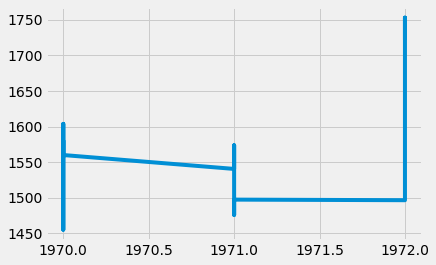

In [82]:
plt.plot(nba_lakers_seventies['year_id'], nba_lakers_seventies['elo_i'])
plt.show() 
# https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
# I am having a difficult time finding documentation that explains the kwargs where I can plot a line that connects to each observation. I'm not sure why it's a smooth line. 
# I've also spent entirely too much tim eon this assignment, because I struggled to find a dataset I felt comfortable that also had an article with a figure I was comfortable with. This is me moving on and I will come back to it later. 

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here